In [1]:
import numpy as np
import pylab as plt  
import scipy
import scipy.stats as stats 
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity

In [2]:
random_state = np.random.RandomState(seed=22)

### Define the function f

In [3]:
def f_ (chi):
    return np.sqrt( (1 + np.sqrt(1-chi**2)) / 2)

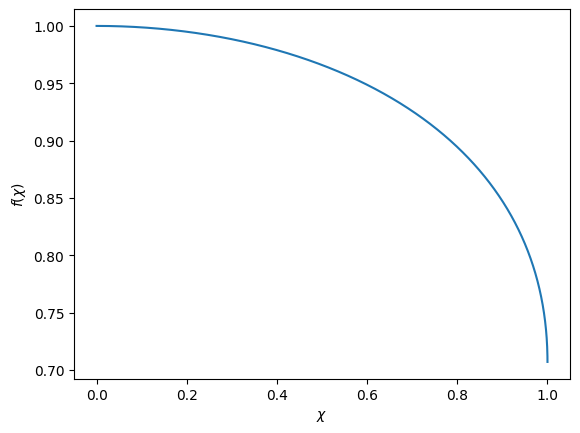

In [4]:
plt.plot(np.linspace(0,1,10000),f_(np.linspace(0,1,10000)));
plt.xlabel(r'$\chi$')
plt.ylabel(r'$f(\chi)$');

### Irreducible mass and simple histograms with arbitrary number of bins

In [5]:
mean = 1
sigma = 0.02  # scale not a parameter
N = 10000

gauss_M = norm(loc=mean, scale=sigma)
uniform_chi = uniform(0,1)

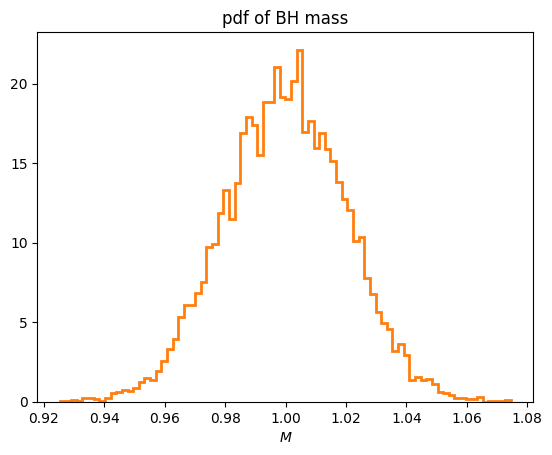

In [6]:
M = gauss_M.rvs(size=N)
chi = uniform_chi.rvs(size=N)

plt.hist(M,density=True,histtype='step',bins=80,lw=2,color='C1')
plt.xlabel('$M$')
plt.title('pdf of BH mass')
plt.show()

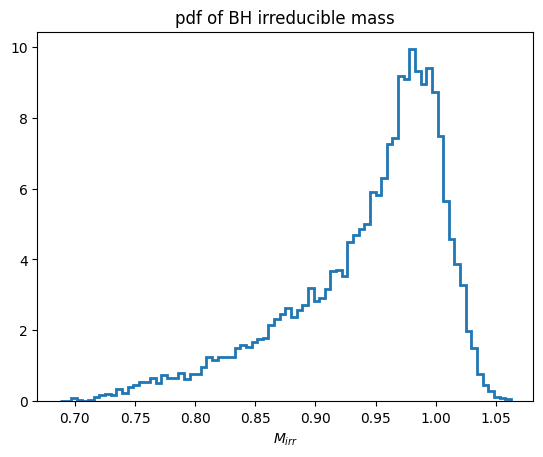

In [7]:
M_irr = f_(chi) * M

plt.hist(M_irr, density=True, bins=80, histtype='step', lw=2)
plt.xlabel(r'$M_{irr}$')
plt.title('pdf of BH irreducible mass')
plt.show()

### Histogram using the **"Freedman-Diaconis rule"**

Number of bins:51


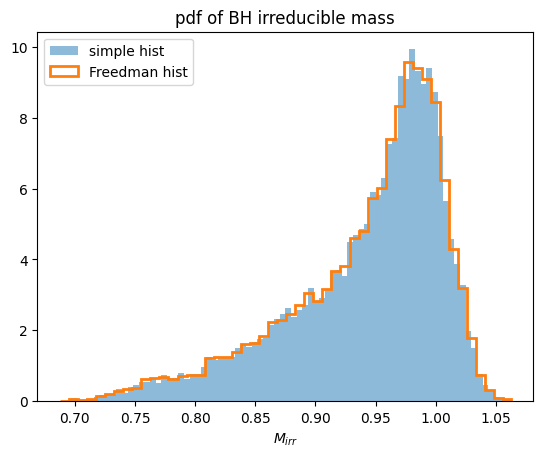

In [8]:
sigmaG2 = astroMLstats.sigmaG(M_irr)

binsize = 2.7*sigmaG2/(N**(1/3))

binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max())
print("Number of bins:" + str(len(binsG)))

plt.hist(M_irr, density=True, bins=80, alpha=0.5, label='simple hist')
plt.hist(M_irr, bins=binsG, density=True, lw=2, histtype='step', label='Freedman hist')

# Quicker:
# _ = hist(x, bins="freedman", histtype="step",density=True)

plt.xlabel(r'$M_{irr}$')
plt.title('pdf of BH irreducible mass')
plt.legend()
plt.show()

### Plot M_irr with a KDE

In [9]:
def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])
    return np.exp(log_pdf)

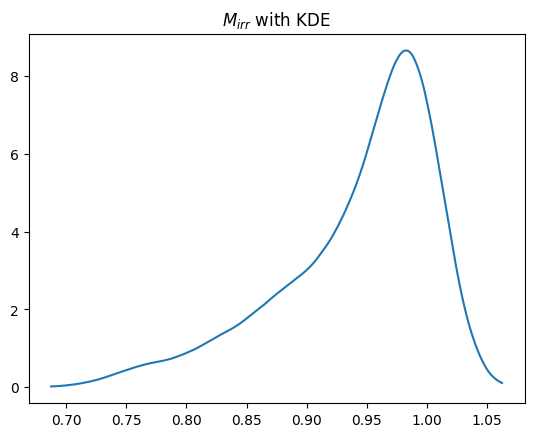

In [10]:
xgrid = np.linspace(M_irr.min(),M_irr.max(),N) 

bandwidth = 0.03
PDF_M_irr = kde_sklearn(M_irr,bandwidth=bandwidth,kernel="epanechnikov")

plt.plot(xgrid, PDF_M_irr, label="M irr")
plt.title(r'$M_{irr}$ with KDE')
plt.show()

### KS distances of M_irr from M and f

In [11]:
sigmas = np.logspace(-5,3,20)
ksM = []
ksf = []

f_chi = f_(chi)

for sigma in sigmas:
    M=norm(loc=mean,scale=sigma).rvs(size=N)
    ksM.append(scipy.stats.ks_2samp(M, M*f_chi))
    ksf.append(scipy.stats.ks_2samp(f_chi, M*f_chi))

ksM= np.array(ksM)
ksf= np.array(ksf)

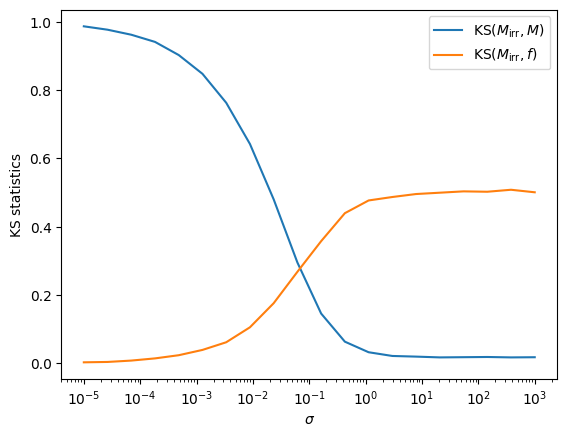

In [12]:
plt.plot(sigmas,ksM[:,0],label="KS$(M_{\\rm irr}, M)$")
plt.plot(sigmas,ksf[:,0],label="KS$(M_{\\rm irr}, f)$")
plt.semilogx()
plt.xlabel(r"$\sigma$")
plt.ylabel('KS statistics')
plt.legend();

For small sigmas, M_irr behaves like f (their difference goes to zero)

For large sigmas, M_irr behaves like M (their difference goes to zero)

### Compute the pdf of $M_{\rm irr}$ from its mathematical definitions and compare it with previous results

In [13]:
mean = 1
sigma = 0.02  # scale not a parameter
N = 10000

M = gauss_M.rvs(size=N)
chi = uniform_chi.rvs(size=N)
M_irr = f_(chi) * M

x = np.linspace(M_irr.min(),M_irr.max(),N) 

def integrand(f,x):
    return (np.sqrt(2/np.pi) / sigma ) * np.exp(-(x/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/np.sqrt(1 - f**2) / f

Mirr_pdf = [scipy.integrate.quad(lambda f: integrand(f,xt), 1/2**0.5,1)[0] for xt in x]


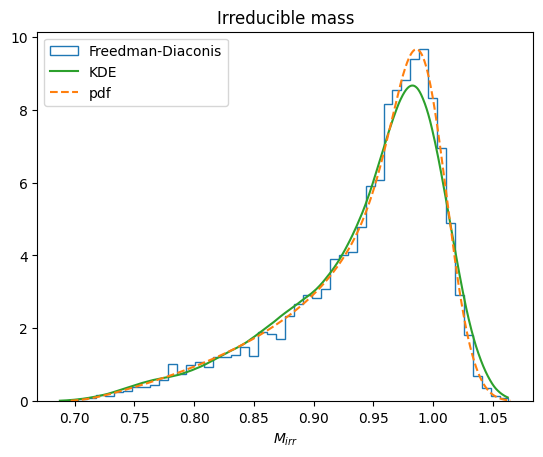

In [14]:
plt.hist(M_irr, bins=binsG, density=True, histtype = 'step', label='Freedman-Diaconis')
plt.plot(xgrid, PDF_M_irr, label='KDE',c='C2')
plt.plot(x, Mirr_pdf, label='pdf', ls='--',color='C1')
plt.xlabel(r'$M_{irr}$')
plt.title('Irreducible mass')
plt.legend()
plt.show()

# ! find the best bandwidth

Now I change the bandwidth to better match the numerical solution

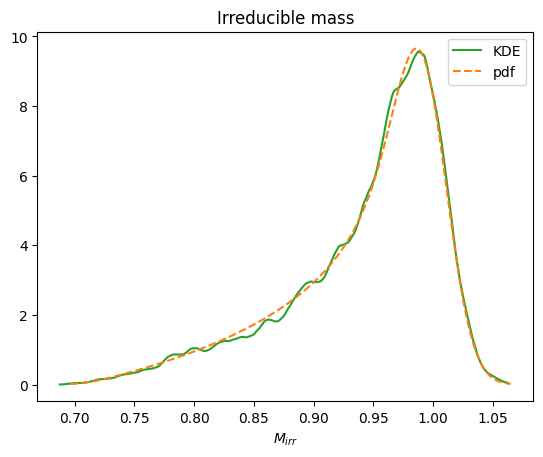

In [15]:
bandwidth = 0.01
bPDF_M_irr = kde_sklearn(M_irr,bandwidth=bandwidth,kernel="epanechnikov")

plt.plot(xgrid, bPDF_M_irr, label='KDE',c='C2')
plt.plot(x, Mirr_pdf, label='pdf', ls='--',color='C1')
plt.xlabel(r'$M_{irr}$')
plt.title('Irreducible mass')
plt.legend()
plt.show()